In [91]:
import pandas as pd
import numpy as np
import glob


SRC_PATH = "./archive/*.csv"
FIELD = 'Pload_actual'

In [92]:
src_files = glob.glob(SRC_PATH)
src_files.sort()
print(src_files)

dst_df = pd.DataFrame()
for f in src_files:
    print(f) 
    df = pd.read_csv(f)        
    df['Time_actual'] = pd.to_datetime(df['Time_actual'], format='%Y-%m-%d %H:%M:%S')
    df['Time'] = df['Time_actual'].dt.strftime("%H:%M:%S")
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    print(df.head())
    print(df.dtypes)
    # df.Time_actual = pd.to_datetime(df.Time_actual).dt.strftime('%H:%M')
    df = df.groupby(pd.Grouper(key='Time', freq='30min')).mean().dropna()          
    dst_df = dst_df._append(df[FIELD].T)

dst_df.reset_index(drop=True, inplace=True)
dst_df.fillna(value=np.nan, inplace=True)
dst_df.fillna(0, inplace=True)
dst_df.to_csv(f'./{FIELD}.csv', index=False)


['./archive/2021-11-14_data.csv', './archive/2021-12-13_data.csv', './archive/2022-01-03_data.csv', './archive/2022-02-01_data.csv', './archive/2022-03-01_data.csv', './archive/2022-04-01_data.csv', './archive/2022-05-02_data.csv', './archive/2022-06-01_data.csv', './archive/2022-07-01_data.csv', './archive/2022-08-01_data.csv', './archive/2022-09-01_data.csv', './archive/2022-10-03_data.csv', './archive/2022-11-01_data.csv', './archive/2022-12-01_data.csv', './archive/2023-01-01_data.csv', './archive/2023-02-03_data.csv', './archive/2023-03-01_data.csv', './archive/2023-04-04_data.csv', './archive/2023-05-02_data.csv', './archive/2023-06-01_data.csv', './archive/2023-07-01_data.csv', './archive/2023-08-01_data.csv', './archive/2023-09-01_data.csv']
./archive/2021-11-14_data.csv
          Time_actual  Ppv_actual  Qpv_actual  Pload_actual  Qload_actual  \
0 2021-11-14 00:00:26           0           0     64.811157  -1045.206543   
1 2021-11-14 00:00:56           0           0     65.504

./archive/2022-01-03_data.csv
          Time_actual  Ppv_actual  Qpv_actual  Pload_actual  Qload_actual  \
0 2022-01-03 00:00:28           0           0    308.217743   -320.880981   
1 2022-01-03 00:00:58           0           0    305.602081   -318.249298   
2 2022-01-03 00:01:28           0           0    299.354553   -321.943237   
3 2022-01-03 00:01:58           0           0    398.441437   -362.820435   
4 2022-01-03 00:02:28           0           0    356.435547   -361.983459   

                 Time  
0 1900-01-01 00:00:28  
1 1900-01-01 00:00:58  
2 1900-01-01 00:01:28  
3 1900-01-01 00:01:58  
4 1900-01-01 00:02:28  
Time_actual     datetime64[ns]
Ppv_actual               int64
Qpv_actual               int64
Pload_actual           float64
Qload_actual           float64
Time            datetime64[ns]
dtype: object
./archive/2022-02-01_data.csv
          Time_actual  Ppv_actual  Qpv_actual  Pload_actual  Qload_actual  \
0 2022-02-01 00:00:11           0           0    272.237

<Axes: >

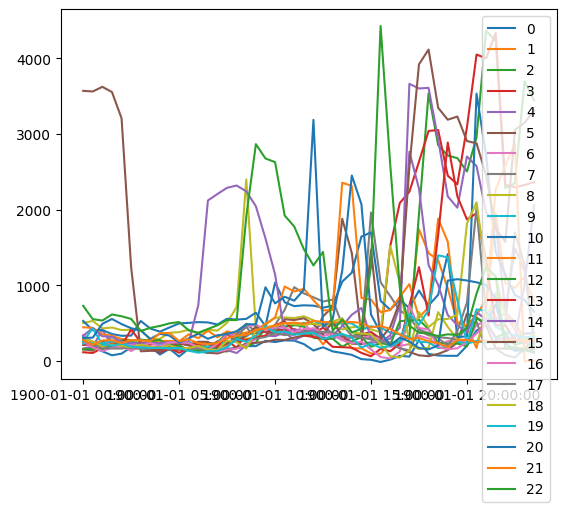

In [93]:
df = pd.read_csv(f'{FIELD}.csv')
df.T.plot()

/var/folders/hv/t1mrtt815b713sd0fqxv51hm0000gn/T/ipykernel_1987/844889010.py:8: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(SRC2_PATH, parse_dates={'DateTime' : ['Date', 'Time']}, na_values=['nan','?'])
/var/folders/hv/t1mrtt815b713sd0fqxv51hm0000gn/T/ipykernel_1987/844889010.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(SRC2_PATH, parse_dates={'DateTime' : ['Date', 'Time']}, na_values=['nan','?'])


<Axes: xlabel='DateTime'>

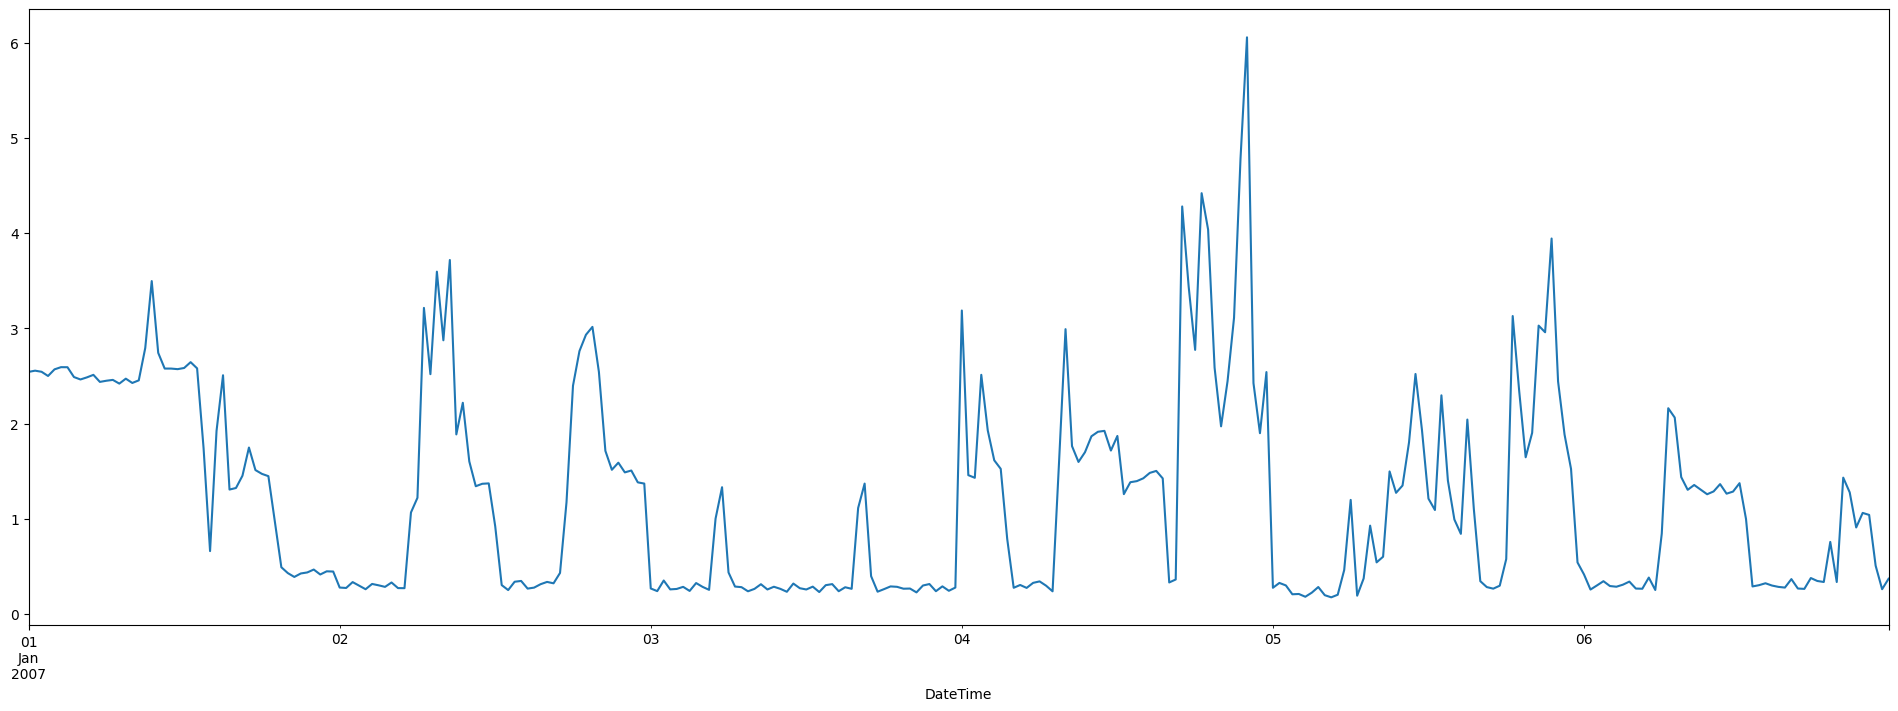

In [9]:
# https://github.com/amirrezaeian/Individual-household-electric-power-consumption-Data-Set-/blob/master/data_e_power.ipynb
import pandas as pd
import matplotlib.pyplot as plt

SRC2_PATH = "household_power_consumption.csv"
FIELD2 = 'Global_active_power'

df = pd.read_csv(SRC2_PATH, parse_dates={'DateTime' : ['Date', 'Time']}, na_values=['nan','?'])
# df = pd.read_csv(SRC2_PATH, na_values=['nan','?'])
df.fillna(0, inplace=True)
df = df.groupby(pd.Grouper(key='DateTime', freq='30min')).mean().dropna()
# df.dtypes
plt.figure(figsize=(24,8))
df['Global_active_power'].iloc[:48*6].plot()

In [95]:
import datetime
columns = []
for i in range(48):
    t = str(datetime.timedelta(seconds=i*30))
    columns.append(pd.to_datetime(t, format='%H:%M:%S'))
columns

[Timestamp('1900-01-01 00:00:00'),
 Timestamp('1900-01-01 00:00:30'),
 Timestamp('1900-01-01 00:01:00'),
 Timestamp('1900-01-01 00:01:30'),
 Timestamp('1900-01-01 00:02:00'),
 Timestamp('1900-01-01 00:02:30'),
 Timestamp('1900-01-01 00:03:00'),
 Timestamp('1900-01-01 00:03:30'),
 Timestamp('1900-01-01 00:04:00'),
 Timestamp('1900-01-01 00:04:30'),
 Timestamp('1900-01-01 00:05:00'),
 Timestamp('1900-01-01 00:05:30'),
 Timestamp('1900-01-01 00:06:00'),
 Timestamp('1900-01-01 00:06:30'),
 Timestamp('1900-01-01 00:07:00'),
 Timestamp('1900-01-01 00:07:30'),
 Timestamp('1900-01-01 00:08:00'),
 Timestamp('1900-01-01 00:08:30'),
 Timestamp('1900-01-01 00:09:00'),
 Timestamp('1900-01-01 00:09:30'),
 Timestamp('1900-01-01 00:10:00'),
 Timestamp('1900-01-01 00:10:30'),
 Timestamp('1900-01-01 00:11:00'),
 Timestamp('1900-01-01 00:11:30'),
 Timestamp('1900-01-01 00:12:00'),
 Timestamp('1900-01-01 00:12:30'),
 Timestamp('1900-01-01 00:13:00'),
 Timestamp('1900-01-01 00:13:30'),
 Timestamp('1900-01-

In [96]:
df2 = df[FIELD2]*1000
Dates = [str(date) for date in sorted(set(df.index.date.tolist()))]
dst_df = pd.DataFrame(columns=columns)
for d in Dates:
    dst_df = dst_df._append(pd.Series(df2.loc[d].to_list(), index=columns).T, ignore_index=True)

dst_df.to_csv(f'./{FIELD2}.csv', index=False)

/var/folders/hv/t1mrtt815b713sd0fqxv51hm0000gn/T/ipykernel_7618/516765014.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dst_df = dst_df._append(pd.Series(df2.loc[d].to_list(), index=columns).T, ignore_index=True)


<Axes: >

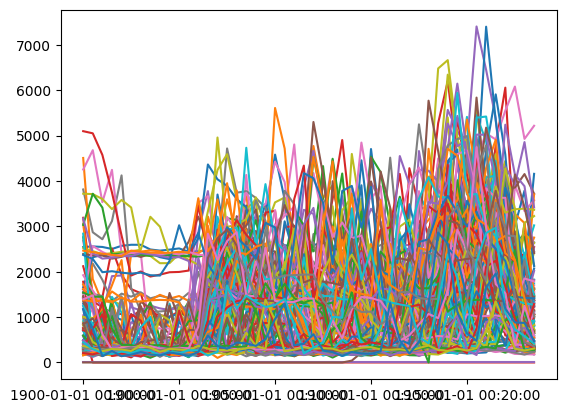

In [97]:
df = pd.read_csv(f'{FIELD2}.csv')
df.T.plot(legend=False)


In [103]:
df1 = pd.read_csv(f'{FIELD}.csv')
df2 = pd.read_csv(f'{FIELD2}.csv', names=df1.columns, header=None)
df = pd.concat([df1, df2.iloc[1:]], ignore_index=True)
df.to_csv(f'./{FIELD}_{FIELD2}.csv')

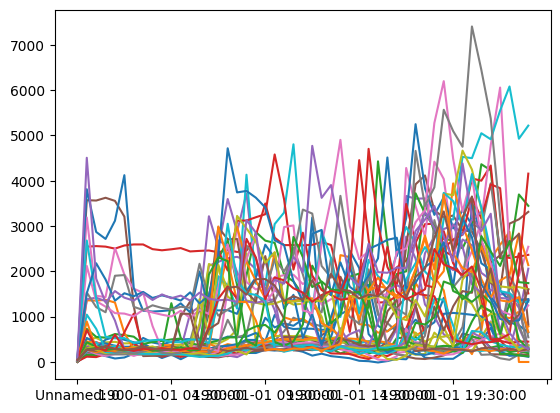

In [99]:
ld = pd.read_csv(f'{FIELD}_{FIELD2}.csv').T
ld.plot(legend=False)

data = list()

for l in ld:
    ld_list = ld[l].to_list()
    data.append(ld_list)
    

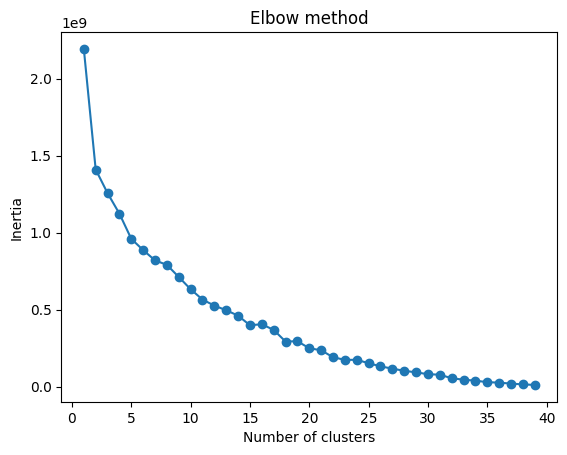

In [100]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

num_cluster = 40
inertias = []
for i in range(1,num_cluster):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,num_cluster), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [101]:
NC = 9
kmeans = KMeans(n_clusters=NC)
kmeans.fit(data)

print(kmeans.labels_)


[1 1 8 8 0 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 2 0 1 4 0 1 6 7 0 0 3 0 0 5
 5 0 0 2 0 0 2 2 0]


RangeIndex(start=0, stop=46, step=1)


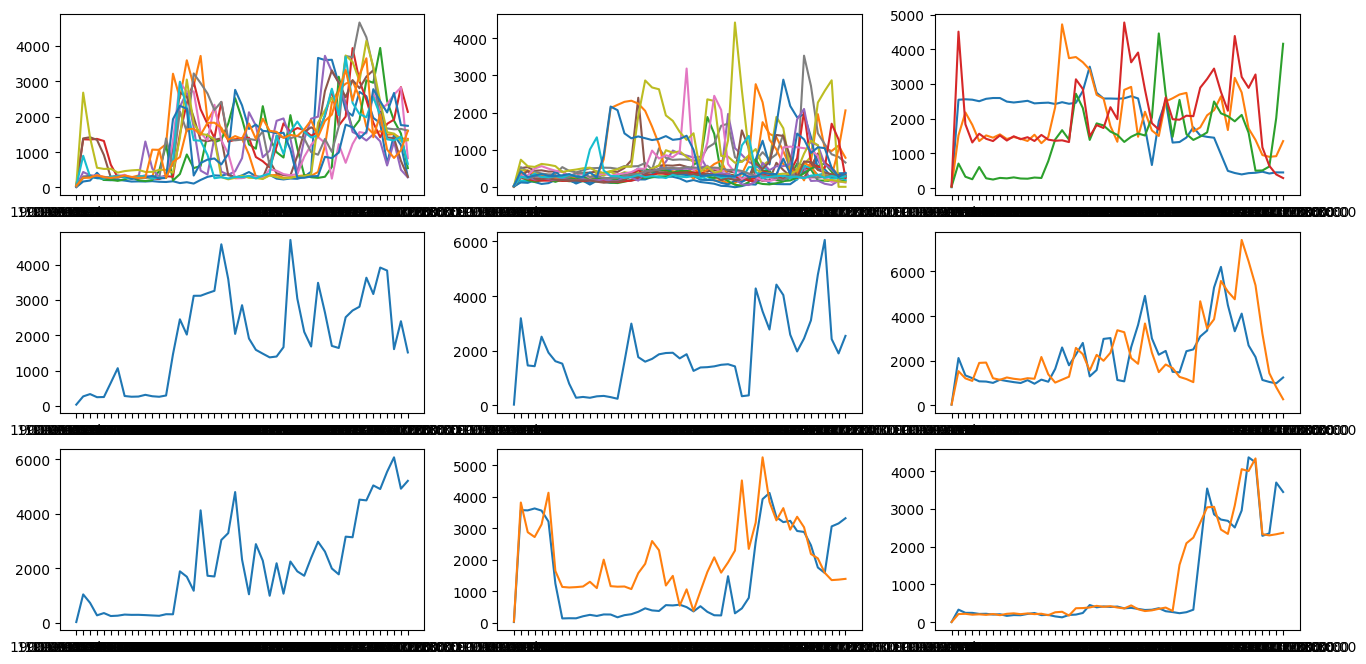

In [102]:
plt.figure(figsize=(16,8))
print(ld.columns)
for i in range(len(ld.columns)):
    plt.subplot(3, 3, kmeans.labels_[i]+1)
    plt.plot(ld[i])